<a href="https://colab.research.google.com/github/ketkiambekar/kaggle/blob/main/Titanic/Kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this notebook we work with the popular titanic dataset. 

In [2]:
#Download dataset from kaggle
! pip install -q kaggle
from google.colab import files
files.upload()

In [115]:
!pip install --upgrade --force-reinstall --no-deps kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle competitions download -c titanic
!unzip titanic.zip

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-01 11:18:46           6538        589  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01         

In [52]:
train=pd.read_csv('train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### From the info, we see that except for columns Age, Cabin and Embarked we have all values. Using common sense, we can intuit that we can drop all but Sex, Age and Pclass columns. 

In [53]:
X_train = train[['Sex', 'Age', 'Pclass']]
Y_train = train[['Survived']]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     891 non-null    object 
 1   Age     714 non-null    float64
 2   Pclass  891 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


In [54]:
test=pd.read_csv('test.csv')
test.head(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [56]:
X_test = test[['Sex', 'Age', 'Pclass']]
X_test

,Sex,Age,Pclass
0,male,34.5,3
1,female,47.0,3
2,male,62.0,2
3,male,27.0,3
4,female,22.0,3
...,...,...,...
413,male,NaN,3
414,female,39.0,1
415,male,38.5,3
416,male,NaN,3


## Handling Missing values
### We replace missing age values by median/mean of the column

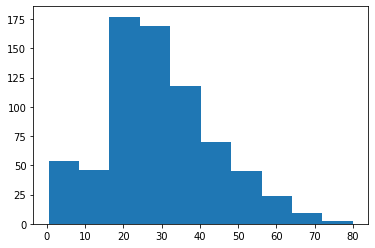

In [42]:
#Plot age distribution
import matplotlib.pyplot as plt
plt.hist(train['Age']);

In [57]:
X_train['Age'].fillna(value= X_train['Age'].dropna().mean(), inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     891 non-null    object 
 1   Age     891 non-null    float64
 2   Pclass  891 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [70]:
X_test['Age'].fillna(value= X_test['Age'].dropna().mean(), inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     418 non-null    object 
 1   Age     418 non-null    float64
 2   Pclass  418 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 9.9+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## Encode the Sex Column. 
### Because it is a binary encoding, we will encode it as Male and Female.

In [58]:
#First lets see the unique values in the sex column
X_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [59]:
#The data seems clean. Now lets go ahead and encode it. 
X_train['Bin_Sex'] = X_train['Sex'].map( {'male':1, 'female':0} )
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sex,Age,Pclass,Bin_Sex
0,male,22.000000,3,1
1,female,38.000000,1,0
2,female,26.000000,3,0
3,female,35.000000,1,0
4,male,35.000000,3,1
...,...,...,...,...
886,male,27.000000,2,1
887,female,19.000000,1,0
888,female,29.699118,3,0
889,male,26.000000,1,1


In [61]:
X_train.drop(columns='Sex', inplace=True)
X_train

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Pclass,Bin_Sex
0,22.000000,3,1
1,38.000000,1,0
2,26.000000,3,0
3,35.000000,1,0
4,35.000000,3,1
...,...,...,...
886,27.000000,2,1
887,19.000000,1,0
888,29.699118,3,0
889,26.000000,1,1


In [71]:
X_test['Bin_Sex'] = X_test['Sex'].map( {'male':1, 'female':0} )
X_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sex,Age,Pclass,Bin_Sex
0,male,34.50000,3,1
1,female,47.00000,3,0
2,male,62.00000,2,1
3,male,27.00000,3,1
4,female,22.00000,3,0
...,...,...,...,...
413,male,30.27259,3,1
414,female,39.00000,1,0
415,male,38.50000,3,1
416,male,30.27259,3,1


In [72]:
X_test.drop(columns='Sex', inplace=True)
X_test

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Pclass,Bin_Sex
0,34.50000,3,1
1,47.00000,3,0
2,62.00000,2,1
3,27.00000,3,1
4,22.00000,3,0
...,...,...,...
413,30.27259,3,1
414,39.00000,1,0
415,38.50000,3,1
416,30.27259,3,1


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, naive_bayes, svm

In [63]:
models = [
    svm.SVC(C=1.0, kernel='linear', degree=10, gamma='auto'),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [65]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
y_preds=[]
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, Y_train['Survived'], scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy*100))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [66]:
cv_df

,model_name,fold_idx,accuracy
0,SVC,0,80.446927
1,SVC,1,80.337079
2,SVC,2,78.651685
3,SVC,3,75.280899
4,SVC,4,78.651685
5,RandomForestClassifier,0,75.418994
6,RandomForestClassifier,1,80.337079
7,RandomForestClassifier,2,79.775281
8,RandomForestClassifier,3,76.404494
9,RandomForestClassifier,4,83.707865


In [79]:
RF = models[1]
RF.fit(X_train, Y_train['Survived'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [98]:
gender_submission = pd.read_csv('gender_submission.csv')
y_test=gender_submission['Survived']

In [80]:
y_pred=RF.predict(X_test)

In [84]:
import numpy as np
accuracy= np.mean(y_pred==y_test)
accuracy

0.8229665071770335

In [95]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [107]:

gender_submission.drop(columns='Survived')
gender_submission['Survived']=y_pred

In [114]:
gender_submission.drop(index=gender_submission.columns.)
gender_submission.to_csv('gender_submission.csv')

KeyError: ignored

In [116]:
gender_submission=None
gender_submission = pd.read_csv('gender_submission.csv', index_col=None)
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [112]:
gender_submission.reset_index(drop=True, inplace=True)
gender_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [108]:
gender_submission=gender_submission[['PassengerId', 'Survived']] 
gender_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
